In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df=pd.read_csv('eda_data.csv')

In [3]:
df.columns

Index(['Unnamed: 0', 'Job Title', 'Salary Estimate', 'Job Description',
       'Rating', 'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python_yn', 'R_yn',
       'spark', 'aws', 'excel', 'job_simp', 'seniority', 'desc_len',
       'num_comp'],
      dtype='object')

In [4]:
df_relevant_col=df[['avg_salary','Rating','Size','Type of ownership','Revenue','num_comp','hourly','employer_provided','job_state','same_state','age', 'python_yn', 'R_yn',
       'spark', 'aws', 'excel', 'job_simp', 'seniority', 'desc_len',]]

In [5]:
#getting dummies
df_dum=pd.get_dummies(df_relevant_col)
df_dum

,avg_salary,Rating,num_comp,hourly,employer_provided,same_state,age,python_yn,R_yn,spark,...,job_simp_analyst,job_simp_data engineer,job_simp_data scientist,job_simp_director,job_simp_manager,job_simp_mle,job_simp_na,seniority_jr,seniority_na,seniority_senior
0,72.0,3.8,0,0,0,0,47,1,0,0,...,0,0,1,0,0,0,0,0,1,0
1,87.5,3.4,0,0,0,0,36,1,0,0,...,0,0,1,0,0,0,0,0,1,0
2,85.0,4.8,0,0,0,1,10,1,0,1,...,0,0,1,0,0,0,0,0,1,0
3,76.5,3.8,3,0,0,1,55,1,0,0,...,0,0,1,0,0,0,0,0,1,0
4,114.5,2.9,3,0,0,1,22,1,0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737,84.5,3.9,3,0,0,0,190,0,0,0,...,0,0,0,0,0,0,1,0,0,1
738,102.5,4.4,3,0,0,0,14,1,0,1,...,0,1,0,0,0,0,0,0,0,1
739,73.5,2.6,0,0,0,1,36,0,0,0,...,0,0,0,0,0,0,1,0,1,0
740,127.5,3.2,0,0,0,0,-1,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [6]:
from sklearn.model_selection import train_test_split

In [7]:
x=df_dum.drop('avg_salary',axis=1)
y=df_dum.avg_salary.values

In [8]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=0)

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
linear_model=LinearRegression()

In [11]:
linear_model.fit(x_train,y_train)

LinearRegression()

In [12]:
from sklearn.model_selection import cross_val_score

In [13]:
np.mean(cross_val_score(linear_model,x_train,y_train,scoring='neg_mean_absolute_error',cv=4))

-20.17105414817123

In [14]:
from sklearn.linear_model import Lasso

In [15]:
lasso=Lasso()

In [16]:
np.mean(cross_val_score(lasso,x_train,y_train,scoring='neg_mean_absolute_error',cv=4))

-22.21673715525933

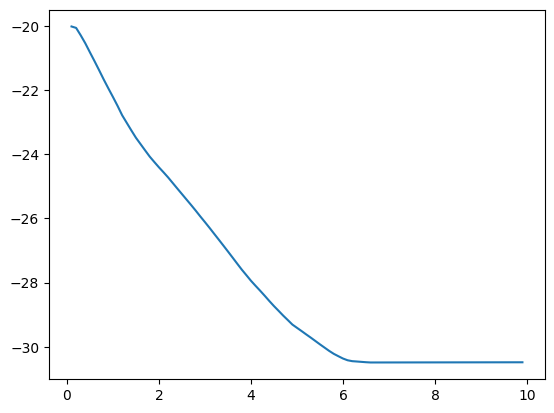

In [17]:
alpha=[]
error=[]

for i in range(1,100):
    alpha.append(i/10)
    lml=Lasso(alpha=i/10)
    error.append(np.mean(cross_val_score(lml,x_train,y_train,scoring='neg_mean_absolute_error',cv=4)))
    
plt.plot(alpha,error)

In [18]:

err=tuple(zip(alpha,error))
df_err=pd.DataFrame(err,columns=['alpha','error'])
df_err[df_err.error==max(df_err.error)]

,alpha,error
0,0.1,-20.020797


In [19]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()



In [20]:
np.mean(cross_val_score(rf,x_train,y_train,scoring='neg_mean_absolute_error',cv=4))

-13.852547274623618

Tuning models

In [21]:
from sklearn.model_selection import GridSearchCV

In [22]:
parameters={'n_estimators':range(10,100,10),'criterion':['mse','absolute_error'],'max_features':['auto','sqrt','log2']}

In [23]:
gs=GridSearchCV(rf,parameters,scoring='neg_mean_absolute_error',cv=4)
gs.fit(x_train,y_train)

C:\Users\Pearry\anaconda3\envs\MachineLearning\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\Pearry\anaconda3\envs\MachineLearning\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\Pearry\anaconda3\envs\MachineLearning\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remov

C:\Users\Pearry\anaconda3\envs\MachineLearning\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\Pearry\anaconda3\envs\MachineLearning\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\Pearry\anaconda3\envs\MachineLearning\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remov

GridSearchCV(cv=4, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mse', 'absolute_error'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': range(10, 100, 10)},
             scoring='neg_mean_absolute_error')

In [24]:
gs.best_score_

-13.765896092191184

In [25]:
gs.best_estimator_

RandomForestRegressor(criterion='absolute_error', max_features='auto',
                      n_estimators=80)

In [26]:
lasso.fit(x_train,y_train)

Lasso()

In [27]:
#tests ensembles

tpred_lin=linear_model.predict(x_test)
tpred_las=lasso.predict(x_test)
tpred_rf=gs.best_estimator_.predict(x_test)

print(tpred_lin,tpred_las,tpred_rf)

[ 76.16362097 145.85593746 126.8990325   97.1509262  107.17451469
  19.89957203  77.52843739 103.03844033 118.97673214  60.35902015
 102.48648089 101.51943986  72.51982582  97.37870933 140.23515622
  92.59726612 150.8883614   72.88125451 138.2809303  131.03389837
  48.62487706 140.28864814 123.67621713  93.19159996  67.92919796
 103.60981638  28.0019364  127.54389809 161.83146292  90.07267513
  60.63730899 146.00485641 116.12786245 130.91584211  45.72231057
 129.55752677  97.08761613  76.16362097 136.16588612 127.64608918
 138.04295597  93.83183775 140.52341324 101.09843791 117.65054009
  90.19736536 106.78314408  72.88125451 109.24780957  58.62581933
 110.1666238  101.04004667 161.83146292  67.56543969  87.79744144
 116.12786245  27.24201951  87.          92.12834787 136.24238698
  56.7180096  130.17948187 127.64608918  94.27599038 109.2002584
 147.15592686  60.50975066  15.92320656  92.6021849   25.99419081
 136.48665528 127.88193421  98.56237598  98.56237598 130.58601041
  69.183146

In [28]:
from sklearn.metrics import mean_absolute_error

print(mean_absolute_error(y_test,tpred_lin))
print(mean_absolute_error(y_test,tpred_las))
print(mean_absolute_error(y_test,tpred_rf))

18.09863595727983
20.77080683680614
12.131501677852349


In [29]:
mean_absolute_error(y_test,(tpred_lin+tpred_rf)/2)

14.481851830808415

In [30]:
import pickle

In [31]:
pick_model={'model':gs.best_estimator_}
pickle.dump(pick_model,open('model_file'+'.p','wb'))

file_name='model_file.p'
with open(file_name,'rb') as pickled:
    data=pickle.load(pickled)
    model= data['model']
    
model.predict(x_test.iloc[1,:].values.reshape(1,-1))


C:\Users\Pearry\anaconda3\envs\MachineLearning\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([123.325])

In [32]:
list(x_test.iloc[1,:])


[3.0,
 0.0,
 0.0,
 0.0,
 1.0,
 5.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 3280.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0]